## 过拟合,欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100
np.random.seed(666)
x = np.random.uniform(-3,3,size=m)
y = x ** 2 + x + 3 + np.random.normal(0.,1.,size=m)
X = x.reshape(-1,1)

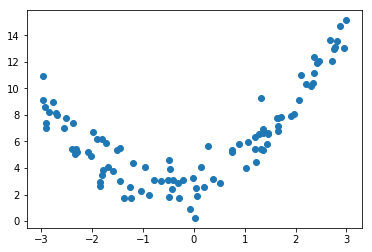

In [3]:
plt.scatter(x,y)
plt.show()

## 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
predict_y = lin_reg.predict(X)

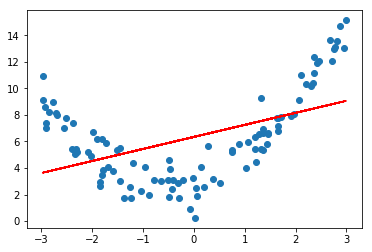

In [8]:
plt.scatter(x,y)
plt.plot(x,predict_y,color='r')
plt.show()

In [11]:
lin_reg.score(X,y)

0.23367624086275207

In [12]:
from sklearn.metrics import mean_squared_error

In [14]:
mean_squared_error(predict_y,y)

8.939721743235754

## 使用多项式回归

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [18]:
def polyRegression(degree):
    return Pipeline(
    [
        ('poly',PolynomialFeatures(degree=degree)),
        ('ss',StandardScaler()),
        ('lr',LinearRegression())
    ]
    )

In [19]:
pip = polyRegression(2)
pip.fit(X,y)
y_p = pip.predict(X)

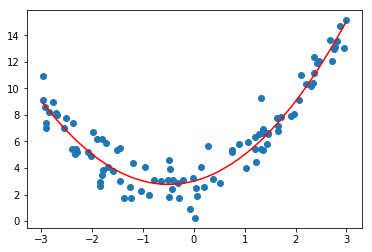

In [20]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_p[np.argsort(x)],color='r')
plt.show()

In [21]:
mean_squared_error(y_p,y)

1.0987392142417856

In [27]:
pip.score(X,y)

0.9058147457882162

In [28]:
poly10_reg = polyRegression(10)
poly10_reg.fit(X,y)
y_p=poly10_reg.predict(X)

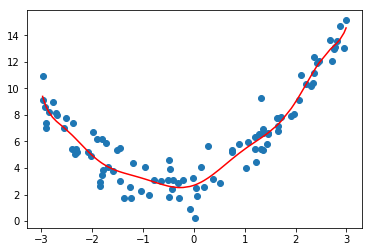

In [30]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_p[np.argsort(x)],color='r')
plt.show()

In [34]:
print(poly10_reg.score(X,y))
mean_squared_error(y_p,y)

0.9099201520531686


1.0508466763764175

In [35]:
polyreg100 = polyRegression(100)
polyreg100.fit(X,y)
y_p = polyreg100.predict(X)

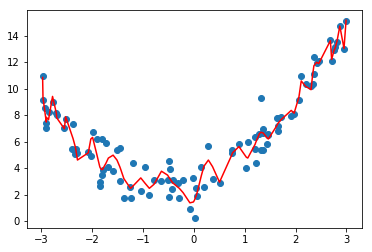

In [37]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_p[np.argsort(x)],color='r')
plt.show()

In [40]:
X_plot = np.linspace(-3,3,100).reshape(-1,1)
y_plot = polyreg100.predict(X_plot)

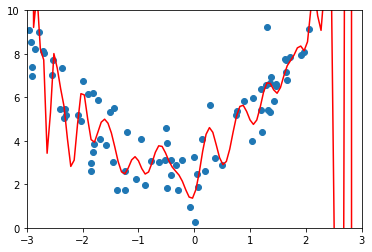

In [48]:
plt.plot(X_plot[:,0],y_plot,color='r')
plt.scatter(x,y)
plt.axis([-3,3,0,10])
plt.show()

## train test split的意义

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [51]:
poly10_reg.fit(X_train,y_train)
poly10_reg.score(X_test,y_test)

0.8668195641300306

In [52]:
poly2 = polyRegression(degree=2)
poly2.fit(X_train,y_train)
poly2.score(X_test,y_test)

0.8987363807042863

In [53]:
poly100 = polyRegression(degree=100)
poly100.fit(X_train,y_train)
poly100.score(X_test,y_test)

-81913445562972.0